### Imports and functions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import intake 
import pprint
# from src.LE_LoadAndMerge import *
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from copy import deepcopy
from src.multi_model_large_ensemble import MultiModelLargeEnsemble
import matplotlib
matplotlib.rc_file_defaults()
import string

In [3]:
def sensitivity_test(parameter,region,x_type,load,args):
    values = args[parameter]
    datasets = []
    for i in values:
        args[parameter] = i
        region.compute_x(x_type=x_type,load=load,**args)
        region.compute_LE()
        region.compute_FIT()
        internal = region.results
        internal = internal.squeeze()
        datasets.append(internal)
    dataset = xr.concat(datasets, dim=values)
    dataset['MTratio'] = (dataset.M_LE/(dataset.M_LE+dataset.Ibar_LE))*100
        
    return dataset

In [4]:
def merge_region_variable(ds1,ds2):
    regions = ['Seattle', 'Sydney', 'Lagos']
    lats = [51, 3.9, -25.2]
    lons = [10.5, 306.9, 133.7]
    region_dim = xr.DataArray(regions, coords={'region': regions})
    variable_dim = xr.DataArray(['tasmax', 'pr'], coords={'variable': ['tasmax', 'pr']}, name='variable')
    
    dataset = xr.concat([ds.sel(
        lat=xr.DataArray(lats, coords={'region': region_dim}), 
        lon=xr.DataArray(lons, coords={'region': region_dim}), 
        method='nearest'
    ) for ds in [ds1, ds2]], dim=variable_dim)
    
    return dataset 

In [5]:
def sensitivity_allregions(parameter,regions,x_type,load,args):
    regions = regions
    dss = []
    for r in regions:
        tmp_args = deepcopy(args)
        ds = sensitivity_test(parameter=parameter,region=r,x_type=x_type,load=load,args=tmp_args)
        ds = ds.expand_dims('region')
        dss.append(ds)
    regions = ['Seattle', 'Sydney', 'Lagos']
    final_dataset = xr.concat(dss,dim='region')
    final_dataset = final_dataset.assign_coords({'region':regions})
    
    return final_dataset

## Sensitivity plots for paper

#### Get Data 

In [6]:
regions_dict = {
    'Seattle': {'lat': 47.6, 'lon': 237.7},
    'Sydney':  {'lat': -33.8, 'lon': 151.2},
    'Lagos':  {'lat': 6.5, 'lon': 3.4},
    'Montreal': {'lat': 45.5, 'lon': 286.2},
}

In [7]:
models = ['MIROC6', 'CanESM5', 'MPI-ESM1-2-LR', 'EC-Earth3','cesm_lens']

In [8]:
region = 'Seattle' 
Seattle_pr = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')

In [9]:
region = 'Montreal' 
Montreal_pr = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')

In [10]:
region = 'Lagos' 
Lagos_pr = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')

In [18]:

region = 'Seattle' 
Seattle_tas = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')

In [19]:
region = 'Montreal' 
Montreal_tas = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')

In [20]:
region = 'Lagos' 
Lagos_tas = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')

#### Hist slice

In [21]:
test_histslice_pr = sensitivity_allregions(parameter='hist_slice',
                                        regions=[Seattle_pr,Montreal_pr,Lagos_pr],
                                        x_type = 'quantile_return',
                                        load=False,
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'consec_days':1,
                                                'rolling_average':10,
                                                'hist_slice':[slice('1980','2000'),
                                                              slice('1990','2010'),slice('1995','2014'),
                                                              slice(None, None), slice('1990', None)]
                                               }
                                       )

100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

3.3364830017089844


3.3400421142578125


3.3355560302734375


100%|██████████| 1/1 [00:00<00:00,  1.93it/s]


  0%|          | 0/1 [00:00<?, ?it/s]

3.3384933471679688


100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

3.3383407592773438


3.3338165283203125


3.3444900512695312


3.3426055908203125


3.343250274658203


3.342578887939453


3.343975067138672


3.351470947265625


3.3453941345214844


3.346637725830078


3.346942901611328


100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

3.3425521850585938


3.3413619995117188



100%|██████████| 1/1 [00:00<00:00,  3.55it/s]



3.2927513122558594


2.9840431213378906


2.9846839904785156


2.9916915893554688


2.9868011474609375


2.9989013671875


3.0023765563964844









100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

3.002063751220703



100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

3.0045738220214844


3.0073394775390625



100%|██████████| 1/1 [00:00<00:00,  3.97it/s]



3.0144271850585938


2.9936065673828125


2.9925079345703125


2.9853973388671875


2.9807395935058594







100%|██████████| 1/1 [00:00<00:00,  4.42it/s]







2.9765586853027344


2.9827728271484375


2.9817352294921875


2.9870223999023438


2.981842041015625


2.9829483032226562


100%|██████████| 1/1 [00:00<00:00,  2.49it/s]










  0%|          | 0/1 [00:00<?, ?it/s]

2.9853439331054688


  0%|          | 0/1 [00:00<?, ?it/s]

2.9792861938476562


100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

2.9595489501953125


2.9597816467285156


2.9545860290527344


2.9597244262695312


2.9527320861816406






100%|██████████| 1/1 [00:00<00:00,  2.21it/s]






2.973468780517578


2.968494415283203


2.9642677307128906


100%|██████████| 1/1 [00:00<00:00,  2.34it/s]






  0%|          | 0/1 [00:00<?, ?it/s]

2.9763450622558594


100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

2.9832115173339844


2.9871482849121094


2.9857101440429688




100%|██████████| 1/1 [00:00<00:00,  3.39it/s]




2.9817428588867188


2.9775390625





100%|██████████| 1/1 [00:00<00:00,  2.17it/s]





2.9769287109375


2.9810447692871094


2.9798507690429688







100%|██████████| 1/1 [00:00<00:00,  5.13it/s]







2.9836654663085938


2.9810256958007812


2.9801101684570312


100%|██████████| 1/1 [00:00<00:00,  1.50it/s]








  0%|          | 0/1 [00:00<?, ?it/s]

2.9798049926757812


  0%|          | 0/1 [00:00<?, ?it/s]

2.9813613891601562


  0%|          | 0/1 [00:00<?, ?it/s]

2.9775161743164062


100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

2.9772109985351562


2.9784927368164062


2.9627342224121094


2.954814910888672


2.9570693969726562


2.9610557556152344













100%|██████████| 1/1 [00:05<00:00,  5.63s/it]

2.9543685913085938



100%|██████████| 1/1 [00:00<00:00,  1.39it/s]






  0%|          | 0/1 [00:00<?, ?it/s]

2.968341827392578


100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

2.9675674438476562


100%|██████████| 1/1 [00:00<00:00,  4.33it/s]


2.9716262817382812


2.980426788330078


2.979633331298828


In [22]:
test_histslice_tas = sensitivity_allregions(parameter='hist_slice',
                                     regions=[Seattle_tas,Montreal_tas,Lagos_tas],
                                        x_type = 'quantile_return',
                                        load=False,
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'consec_days':1,
                                                'rolling_average':10,
                                                'hist_slice':[slice('1980','2000'),
                                                              slice('1990','2010'),slice('1995','2014'),
                                                              slice(None, None), slice('1990', None)]
                                               }
                                       )

2.97705078125


2.975128173828125


2.9867515563964844


2.9821128845214844


2.9827651977539062


2.9227828979492188


100%|██████████| 1/1 [00:00<00:00,  1.49it/s]









  0%|          | 0/1 [00:00<?, ?it/s]

2.9205551147460938


  0%|          | 0/1 [00:00<?, ?it/s]

2.917011260986328


100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

2.9199867248535156


2.9214210510253906



100%|██████████| 1/1 [00:00<00:00,  2.78it/s]



2.9147987365722656



100%|██████████| 1/1 [00:00<00:00,  2.90it/s]



2.9157447814941406



100%|██████████| 1/1 [00:00<00:00,  4.03it/s]



2.92779541015625


2.9251747131347656




100%|██████████| 1/1 [00:00<00:00,  2.86it/s]




2.921722412109375


2.8976097106933594


2.897632598876953






100%|██████████| 1/1 [00:00<00:00,  3.54it/s]






2.902568817138672


100%|██████████| 1/1 [00:01<00:00,  1.58s/it]




  0%|          | 0/1 [00:00<?, ?it/s]

2.9004592895507812


100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

2.898296356201172


100%|██████████| 1/1 [00:00<00:00,  2.34it/s]


2.9069175720214844


2.9048118591308594


2.9089012145996094


2.922832489013672





100%|██████████| 1/1 [00:00<00:00,  2.36it/s]





2.924236297607422


2.9226455688476562


2.9278106689453125








100%|██████████| 1/1 [00:00<00:00,  2.27it/s]








2.9182167053222656


2.9220008850097656


2.923381805419922










100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

2.921825408935547



100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

2.927745819091797


100%|██████████| 1/1 [00:00<00:00,  4.57it/s]


2.924266815185547


2.920848846435547


2.9230384826660156


2.9243812561035156





100%|██████████| 1/1 [00:00<00:00,  2.70it/s]





2.926025390625





100%|██████████| 1/1 [00:00<00:00,  4.22it/s]





2.92218017578125


2.920623779296875






100%|██████████| 1/1 [00:00<00:00,  2.92it/s]






2.92523193359375


2.9018173217773438







100%|██████████| 1/1 [00:00<00:00,  1.05it/s]

2.9000167846679688



100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

2.8993911743164062


2.9041976928710938


2.9032821655273438


2.915241241455078


2.914112091064453






100%|██████████| 1/1 [00:00<00:00,  4.61it/s]






2.910297393798828


2.9225845336914062


2.923877716064453


2.922046661376953


2.9211196899414062










100%|██████████| 1/1 [00:06<00:00,  6.28s/it]

2.91754150390625



100%|██████████| 1/1 [00:00<00:00,  1.05it/s]

2.9133949279785156


2.9378280639648438



100%|██████████| 1/1 [00:00<00:00,  2.33it/s]



2.9226608276367188


2.922882080078125


2.927154541015625


2.92962646484375






100%|██████████| 1/1 [00:00<00:00,  2.50it/s]






2.9511680603027344


2.9525108337402344


2.9461021423339844








100%|██████████| 1/1 [00:00<00:00,  5.07it/s]








2.9503135681152344


2.902088165283203


2.897724151611328


100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

2.86688232421875


2.865009307861328



100%|██████████| 1/1 [00:00<00:00,  3.36it/s]



2.873432159423828


2.899608612060547


2.863201141357422


2.876323699951172


2.9043960571289062







100%|██████████| 1/1 [00:00<00:00,  5.29it/s]







2.9023590087890625


2.8749046325683594


2.8911972045898438


In [23]:
variable_dim = xr.DataArray(['tasmax', 'pr'], coords={'variable': ['tasmax', 'pr']}, name='variable')
    
test_histslice = xr.concat([test_histslice_tas, test_histslice_pr], dim=variable_dim)

100%|██████████| 1/1 [00:03<00:00,  3.49s/it]


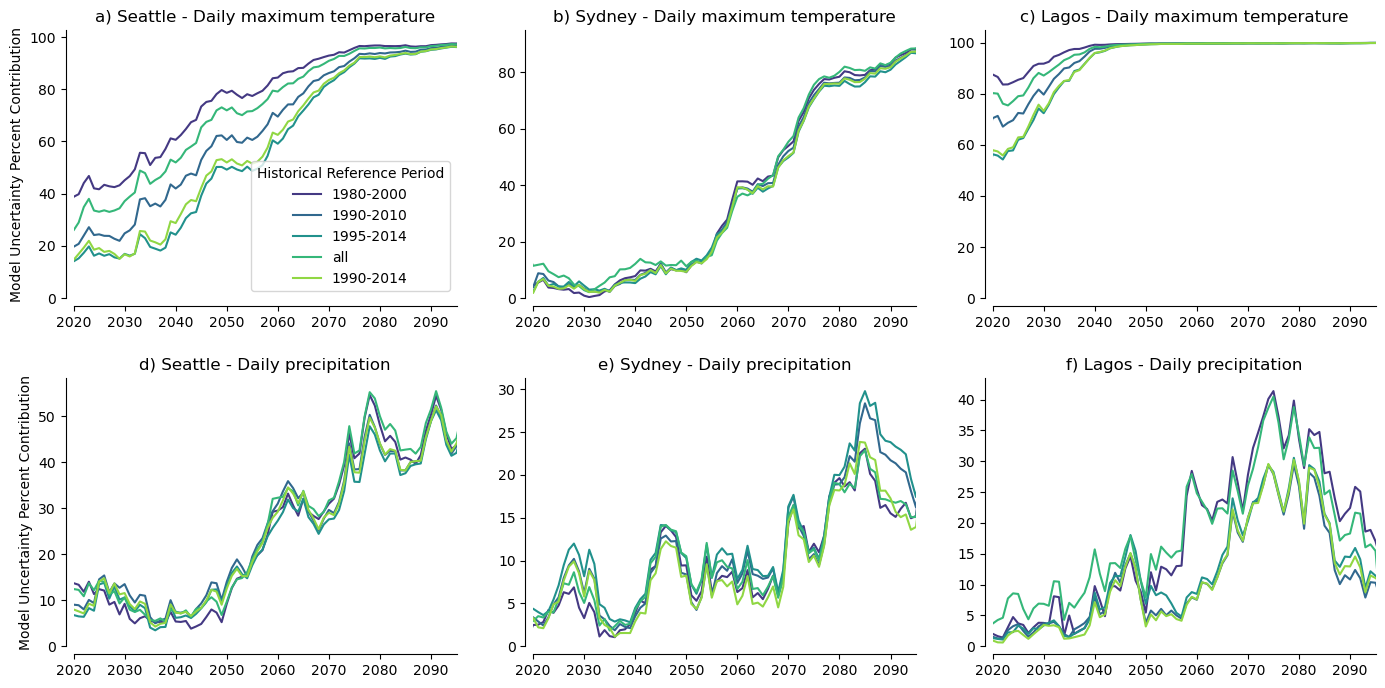

In [24]:
colors = sns.color_palette("viridis", len(test_histslice.concat_dim))
var_dict = {'tasmax': 'Daily maximum temperature', 'pr': 'Daily precipitation'}
fig, axs = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(14,7))

count = 0
for iv, v in enumerate(test_histslice['variable'].values):
    for ir, r in enumerate(test_histslice.region.values):
        ax = axs[iv, ir]
        for im in range(len(test_histslice.concat_dim.values)):
            ax.plot(test_histslice.sel(variable=v,region=r).isel(concat_dim=im).time,test_histslice.sel(variable=v,region=r).isel(concat_dim=im).MTratio,c=colors[im])
            # test_return.sel(variable=v, region=r).MTratio.plot(ax=ax,c=colors[im],hue='concat_dim', lw=2,label='Model:Total ratio',add_legend=False)
        
        ax.set_xlim(np.datetime64('2020'), np.datetime64('2095'))
        ax.set_ylim(bottom=0)
        ax.set_title(f'{string.ascii_lowercase[count]}) {r} - {var_dict[v]}')
        ax.set_xlabel('')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines["bottom"].set_position(("axes", -0.03)) 
        ax.spines["left"].set_position(("axes", -0.02))
#         ax.set_facecolor('0.95')
        count += 1
labels = ['1980-2000','1990-2010','1995-2014','all','1990-2014']
axs[0, 0].legend(labels=labels,title='Historical Reference Period')
for ax in axs[:, 0]:
    ax.set_ylabel('Model Uncertainty Percent Contribution')
    
plt.subplots_adjust(left=0.06, right=0.99, bottom=0.07, top=0.95, wspace=0.20, hspace=0.30)  # all parameters MUST be specified for reproducibility!
# fig.patch.set_facecolor('0.9')   # Hack to get grayscale. To see actual figure size.
fig.savefig('./plots/sensitivity_testhistslice.png', dpi=200)

In [25]:
# 'non-qdm'

# Extreme events occurence

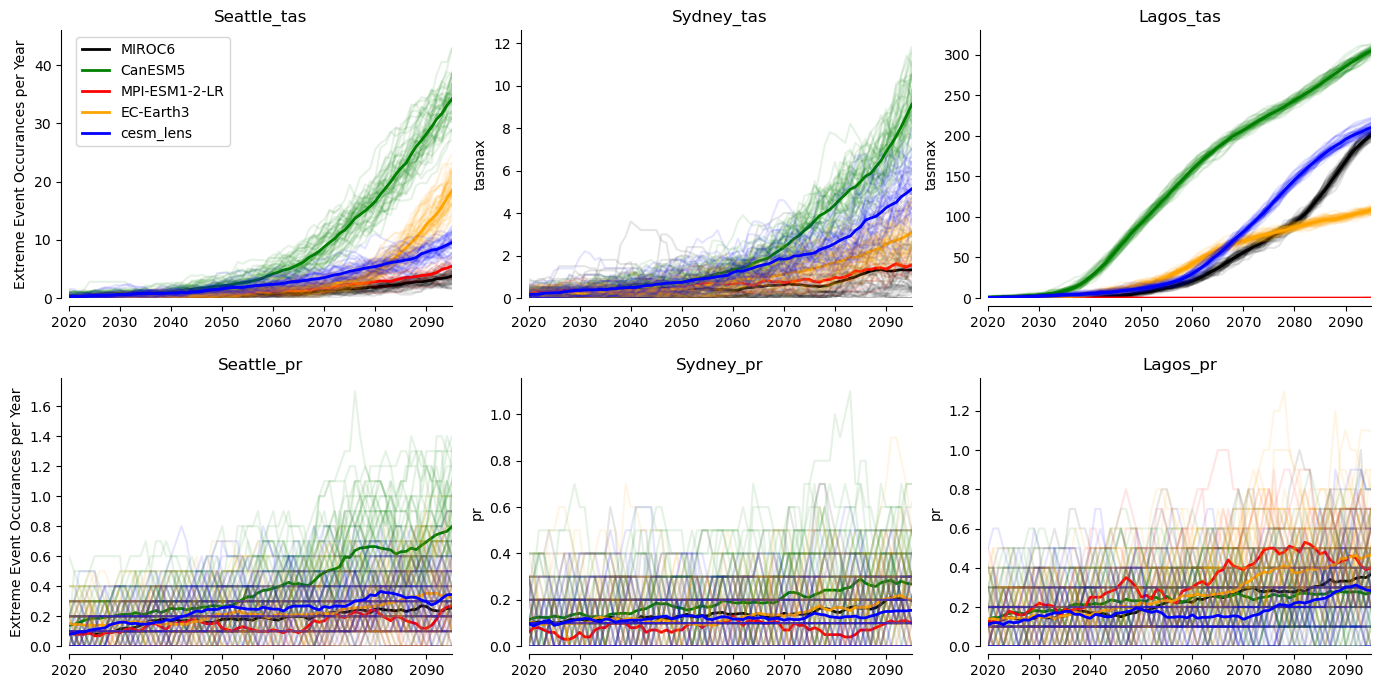

In [26]:
# Figure 1
colors = ['k','g','r','orange', 'b']

fig, axs = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(14,7))
titles = ['Seattle_tas','Montreal_tas','Lagos_tas','Seattle_pr','Montreal_pr','Lagos_pr']

for ir, r in enumerate([Seattle_tas,Montreal_tas,Lagos_tas,Seattle_pr,Montreal_pr,Lagos_pr]):
    ax = axs.ravel()[ir]
    for im, m in enumerate(r.x.model.values):
        ((r.x.sel(model=m).mean('member_id'))/10).plot(ax=ax, lw=2, c=colors[im], label=m)
        ((r.x.sel(model=m))/10).plot(ax=ax, c=colors[im], hue='member_id',add_legend=False, alpha=0.1)
    ax.set_xlim(np.datetime64('2020'), np.datetime64('2095'))
    ax.set_ylim(bottom=0)
    ax.set_title(f'{titles[ir]}')
    ax.set_xlabel('')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines["bottom"].set_position(("axes", -0.03)) 
    ax.spines["left"].set_position(("axes", -0.02))
#         ax.set_facecolor('0.95')
axs[0, 0].legend()
for ax in axs[:, 0]:
    ax.set_ylabel('Extreme Event Occurances per Year')
    
plt.subplots_adjust(left=0.06, right=0.99, bottom=0.07, top=0.95, wspace=0.20, hspace=0.30)  # all parameters MUST be specified for reproducibility!
# fig.patch.set_facecolor('0.9')   # Hack to get grayscale. To see actual figure size.
fig.savefig('./plots/region_x_ensemble.png', dpi=200)

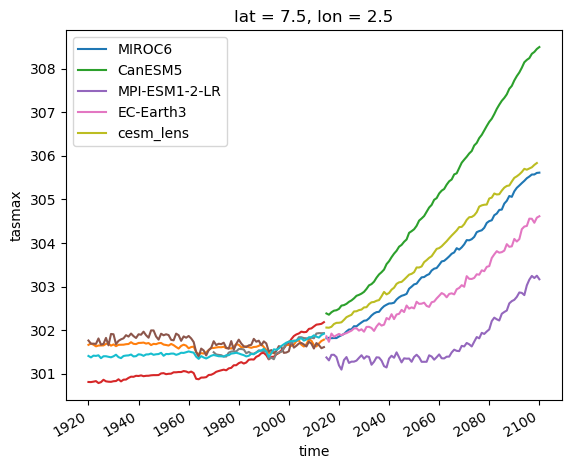

In [30]:
for model in Lagos_tas.future_dsets:
   Lagos_tas.future_dsets[model].mean('member_id').resample(time='AS').mean().load().plot(label = model)
   Lagos_tas.hist_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()
plt.legend()

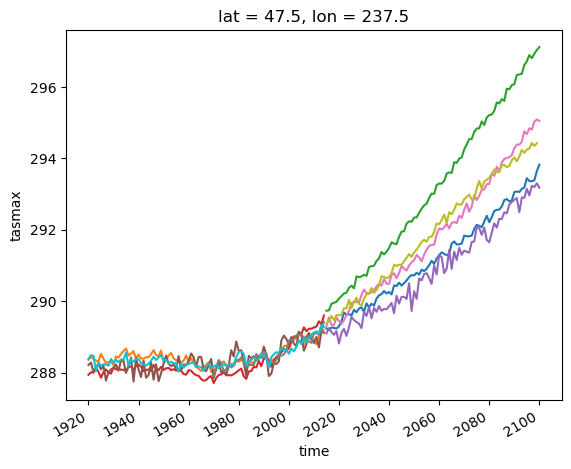

In [27]:
for model in Seattle_tas.future_dsets:
   Seattle_tas.future_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()
   Seattle_tas.hist_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()

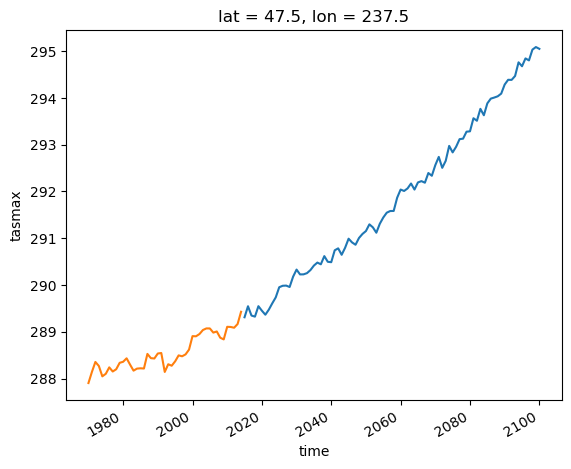

In [28]:
model = 'EC-Earth3'
Seattle_tas.future_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()
Seattle_tas.hist_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()

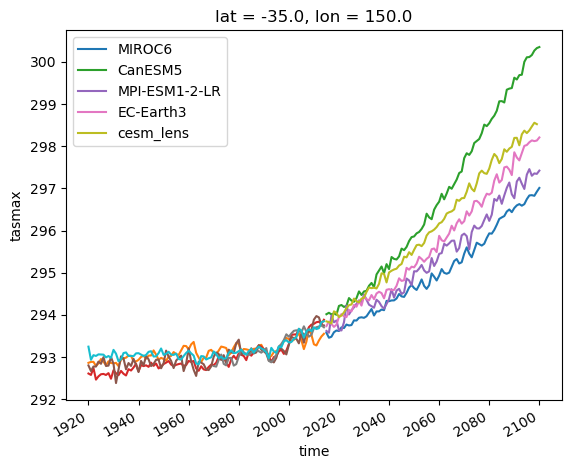

In [29]:
for model in Seattle_tas.future_dsets:
   Sydney_tas.future_dsets[model].mean('member_id').resample(time='AS').mean().load().plot(label = model)
   Sydney_tas.hist_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()
plt.legend()

## No QDM

In [32]:
region = 'Seattle' 
Seattle_tas_no_Qdm = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [33]:
region = 'Montreal' 
Montreal_tas_no_Qdm = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [34]:
region = 'Lagos' 
Lagos_tas_no_Qdm = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [35]:
region = 'Seattle' 
Seattle_pr_no_Qdm = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [36]:
region = 'Montreal' 
Montreal_pr_no_Qdm = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [37]:
region = 'Lagos' 
Lagos_pr_no_Qdm = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

#### Hist slice

In [38]:
test_histslice_pr_no_Qdm = sensitivity_allregions(parameter='hist_slice',
                                        regions=[Seattle_pr_no_Qdm, Montreal_pr_no_Qdm, Lagos_pr_no_Qdm],
                                        x_type = 'quantile_return',
                                        load=False,
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'consec_days':1,
                                                'rolling_average':10,
                                                'hist_slice':[slice('1980','2000'),
                                                              slice('1990','2010'),slice('1995','2014'),
                                                              slice(None, None), slice('1990', None)]
                                               }
                                       )

100%|██████████| 1/1 [00:04<00:00,  4.69s/it]

3.2948646545410156


3.2934303283691406



100%|██████████| 1/1 [00:01<00:00,  1.15s/it]



3.295032501220703


3.343273162841797


3.3411903381347656


3.341327667236328


3.382122039794922







100%|██████████| 1/1 [00:00<00:00,  1.00it/s]







3.377727508544922


3.3230743408203125


3.3311233520507812


3.3714141845703125


3.37078857421875


3.366771697998047


3.4250030517578125


3.420421600341797


3.343902587890625


3.346599578857422


3.3753089904785156


3.3328590393066406


3.3581314086914062


3.470050811767578


3.564868927001953





















100%|██████████| 1/1 [00:00<00:00,  1.62it/s]




















3.5802574157714844


3.5932388305664062
3.6757583618164062
3.783588409423828
3.4133224487304688
3.413440704345703
3.4628067016601562
3.4626541137695312
3.341594696044922
3.3695335388183594





















100%|██████████| 1/1 [00:00<00:00,  1.02it/s]




















3.368915557861328


3.4249801635742188
3.4265518188476562
3.3566970825195312
3.351612091064453





















100%|██████████| 1/1 [00:00<00:00,  1.68it/s]




















3.3362693786621094


3.380146026611328
3.384479522705078
3.368328094482422
3.337005615234375





















100%|██████████| 1/1 [00:00<00:00,  1.78it/s]




















3.347442626953125


3.3486251831054688
3.3664474487304688
3.4354820251464844
3.3364524841308594
3.3469772338867188
3.3840408325195312
3.391040802001953


100%|██████████| 1/1 [00:04<00:00,  4.90s/it]

3.4210205078125


3.535614013671875


3.5298080444335938


3.3668861389160156


3.3852615356445312


3.4374351501464844


3.452472686767578


3.4565505981445312


3.4617233276367188


3.373077392578125


3.454181671142578


3.4567222595214844













100%|██████████| 1/1 [00:00<00:00,  1.42it/s]













3.3791351318359375


3.411449432373047


3.413227081298828


3.3672828674316406


3.3984451293945312


3.399799346923828


3.4429054260253906


3.441844940185547


3.4476661682128906
3.5048904418945312





















100%|██████████| 1/1 [00:00<00:00,  1.97it/s]




















3.5080490112304688


3.4952316284179688
3.500476837158203


In [39]:
test_histslice_tas_no_Qdm = sensitivity_allregions(parameter='hist_slice',
                                     regions=[Seattle_tas_no_Qdm, Montreal_tas_no_Qdm, Lagos_tas_no_Qdm],
                                        x_type = 'quantile_return',
                                        load=False,
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'consec_days':1,
                                                'rolling_average':10,
                                                'hist_slice':[slice('1980','2000'),
                                                              slice('1990','2010'),slice('1995','2014'),
                                                              slice(None, None), slice('1990', None)]
                                               }
                                       )

3.6069107055664062
3.6546058654785156
3.6586761474609375
3.740985870361328
3.8046226501464844
3.8007240295410156
3.43194580078125
3.435028076171875
3.439525604248047
3.474590301513672
3.517681121826172
3.5260658264160156





















100%|██████████| 1/1 [00:00<00:00,  1.74it/s]




















3.5228233337402344


3.571735382080078
3.5568275451660156
3.532146453857422
3.5888938903808594





















100%|██████████| 1/1 [00:00<00:00,  1.80it/s]




















3.6011390686035156


3.585315704345703
3.647228240966797
3.6988372802734375
3.68194580078125





















100%|██████████| 1/1 [00:00<00:00,  2.06it/s]




















3.6941566467285156


3.758960723876953
3.7584304809570312
3.8182601928710938
3.871173858642578





















100%|██████████| 1/1 [00:00<00:00,  1.09it/s]




















3.8690872192382812


3.4523086547851562
3.4649581909179688
3.4506149291992188


100%|██████████| 1/1 [00:03<00:00,  3.33s/it]

3.3962478637695312


100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


3.4016761779785156


3.3998184204101562


3.403839111328125


3.4137115478515625


3.4198684692382812


3.424518585205078


3.4622726440429688


3.4733238220214844


3.422962188720703


3.37188720703125











100%|██████████| 1/1 [00:00<00:00,  1.84it/s]











3.378406524658203


3.3911514282226562


3.3917465209960938


3.46160888671875


3.490489959716797


3.522510528564453


3.548900604248047


3.5756874084472656


3.623760223388672


3.820178985595703


3.813640594482422
3.870868682861328
3.5473403930664062
3.481731414794922
3.5524368286132812
3.5168113708496094
3.5236968994140625
3.6238059997558594
3.6122360229492188
3.6814002990722656
3.658477783203125
3.676929473876953
3.6927947998046875
3.5833206176757812
3.649616241455078





















100%|██████████| 1/1 [00:00<00:00,  1.05it/s]




















3.698974609375


3.6959686279296875
3.6881561279296875
3.707500457763672
3.7492103576660156
3.7848854064941406
3.7999267578125
3.862640380859375


In [40]:
variable_dim = xr.DataArray(['tasmax', 'pr'], coords={'variable': ['tasmax', 'pr']}, name='variable')
test_histslice_no_Qdm = xr.concat([test_histslice_tas_no_Qdm, test_histslice_pr_no_Qdm], dim=variable_dim)

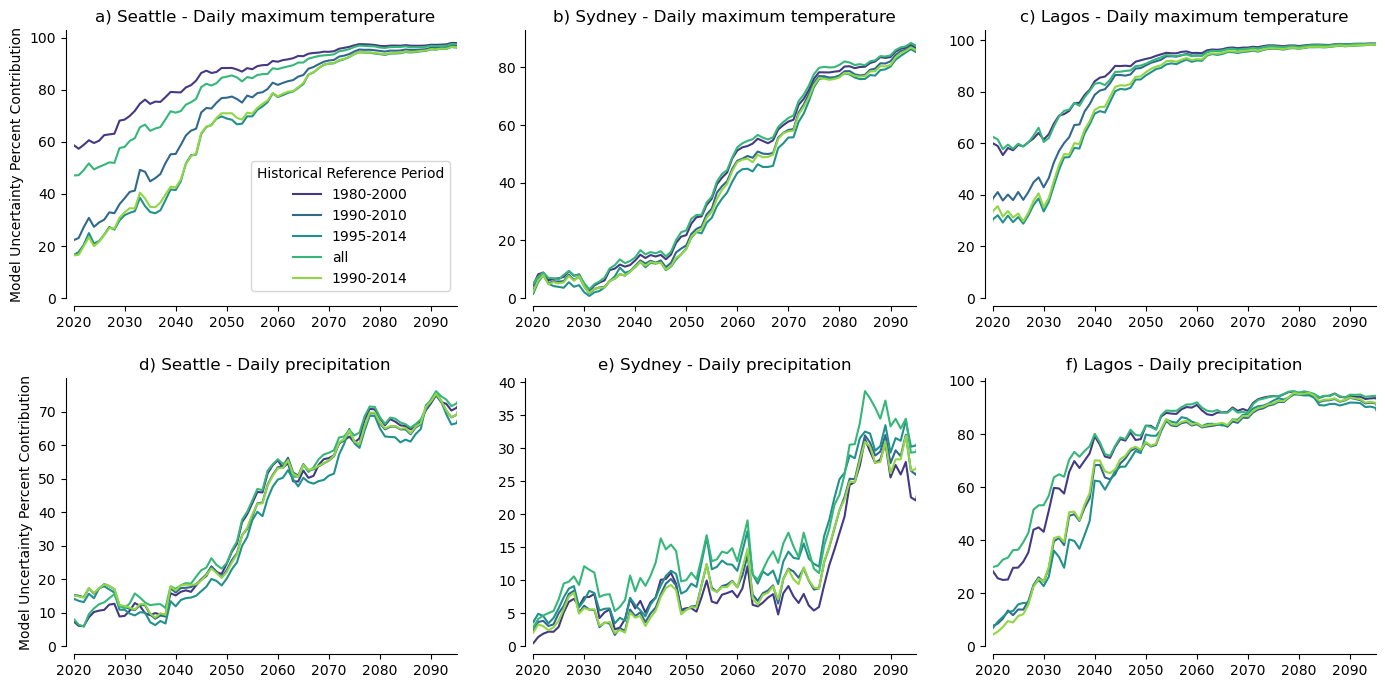

In [41]:
colors = sns.color_palette("viridis", len(test_histslice_no_Qdm.concat_dim))
var_dict = {'tasmax': 'Daily maximum temperature', 'pr': 'Daily precipitation'}
fig, axs = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(14,7))

count = 0
for iv, v in enumerate(test_histslice_no_Qdm['variable'].values):
    for ir, r in enumerate(test_histslice_no_Qdm.region.values):
        ax = axs[iv, ir]
        for im in range(len(test_histslice_no_Qdm.concat_dim.values)):
            ax.plot(test_histslice_no_Qdm.sel(variable=v,region=r).isel(concat_dim=im).time,test_histslice_no_Qdm.sel(variable=v,region=r).isel(concat_dim=im).MTratio,c=colors[im])
            # test_return.sel(variable=v, region=r).MTratio.plot(ax=ax,c=colors[im],hue='concat_dim', lw=2,label='Model:Total ratio',add_legend=False)
        
        ax.set_xlim(np.datetime64('2020'), np.datetime64('2095'))
        ax.set_ylim(bottom=0)
        ax.set_title(f'{string.ascii_lowercase[count]}) {r} - {var_dict[v]}')
        ax.set_xlabel('')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines["bottom"].set_position(("axes", -0.03)) 
        ax.spines["left"].set_position(("axes", -0.02))
#         ax.set_facecolor('0.95')
        count += 1
labels = ['1980-2000','1990-2010','1995-2014','all','1990-2014']
axs[0, 0].legend(labels=labels,title='Historical Reference Period')
for ax in axs[:, 0]:
    ax.set_ylabel('Model Uncertainty Percent Contribution')
    
plt.subplots_adjust(left=0.06, right=0.99, bottom=0.07, top=0.95, wspace=0.20, hspace=0.30)  # all parameters MUST be specified for reproducibility!
# fig.patch.set_facecolor('0.9')   # Hack to get grayscale. To see actual figure size.
fig.savefig('./plots/sensitivity_testhistslice.png', dpi=200)

100%|██████████| 1/1 [00:11<00:00, 11.31s/it]


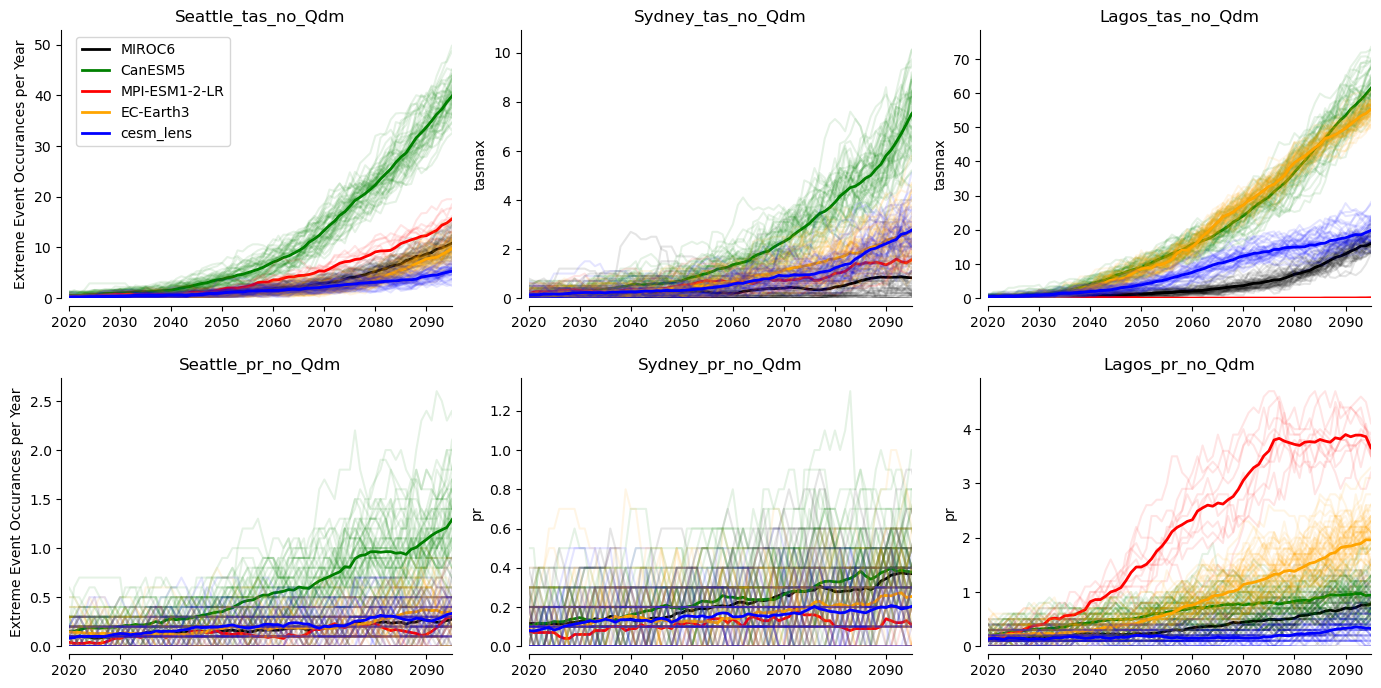

In [42]:
# Figure 1
colors = ['k','g','r','orange', 'b']

fig, axs = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(14,7))
titles = ['Seattle_tas_no_Qdm','Sydney_tas_no_Qdm','Lagos_tas_no_Qdm','Seattle_pr_no_Qdm','Sydney_pr_no_Qdm','Lagos_pr_no_Qdm']

for ir, r in enumerate([Seattle_tas_no_Qdm,Sydney_tas_no_Qdm,Lagos_tas_no_Qdm,Seattle_pr_no_Qdm,Sydney_pr_no_Qdm,Lagos_pr_no_Qdm]):
    ax = axs.ravel()[ir]
    for im, m in enumerate(r.x.model.values):
        ((r.x.sel(model=m).mean('member_id'))/10).plot(ax=ax, lw=2, c=colors[im], label=m)
        ((r.x.sel(model=m))/10).plot(ax=ax, c=colors[im], hue='member_id',add_legend=False, alpha=0.1)
    ax.set_xlim(np.datetime64('2020'), np.datetime64('2095'))
    ax.set_ylim(bottom=0)
    ax.set_title(f'{titles[ir]}')
    ax.set_xlabel('')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines["bottom"].set_position(("axes", -0.03)) 
    ax.spines["left"].set_position(("axes", -0.02))
#         ax.set_facecolor('0.95')
axs[0, 0].legend()
for ax in axs[:, 0]:
    ax.set_ylabel('Extreme Event Occurances per Year')
    
plt.subplots_adjust(left=0.06, right=0.99, bottom=0.07, top=0.95, wspace=0.20, hspace=0.30)  # all parameters MUST be specified for reproducibility!
# fig.patch.set_facecolor('0.9')   # Hack to get grayscale. To see actual figure size.
fig.savefig('./plots/region_x_ensemble.png', dpi=200)

In [ ]:
for model in Lagos_tas.future_dsets:
   Lagos_tas_no_Qdm.future_dsets[model].mean('member_id').resample(time='AS').mean().load().plot(label = model)
   Lagos_tas_no_Qdm.hist_dsets[model].mean('member_id').resample(time='AS').mean().load().plot()
plt.legend()

In [45]:
    region = 'Lagos'
    path = f'gcs://climateai_data_repository/tmp/internal_variability/era_files/{region}/reanalysis_daily.zarr'
    reanalysis_daily = xr.open_zarr(path, consolidated=True).load()

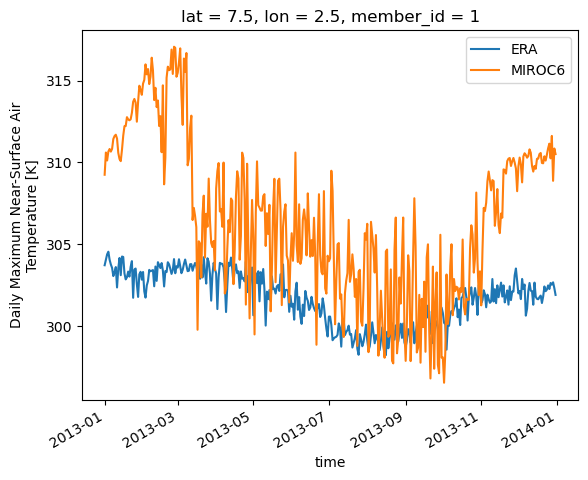

In [68]:
(reanalysis_daily+273.15).t2m_max.sel(time='2013').plot(label='ERA')
#Lagos_tas_no_Qdm.hist_dsets['CanESM5'].sel(member_id=1, time='2012').plot()
Lagos_tas_no_Qdm.hist_dsets['MIROC6'].sel(member_id=1, time='2013').plot(label='MIROC6')
plt.legend()

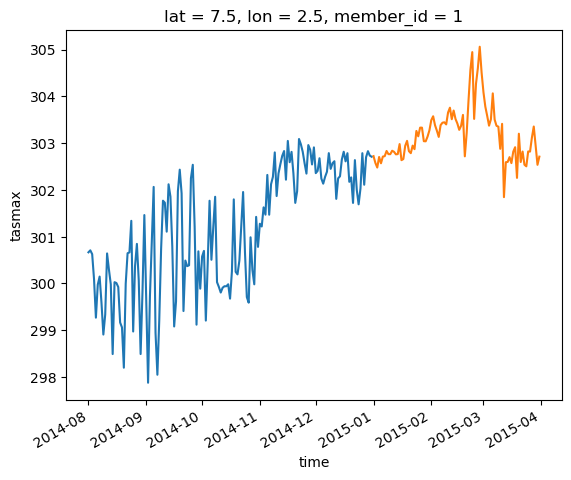

In [79]:
Lagos_tas.hist_dsets['MIROC6'].sel(member_id=1, time=slice('2014-08', None)).plot(label='MIROC6')
Lagos_tas.future_dsets['MIROC6'].sel(member_id=1, time=slice(None, '2015-03')).plot(label='MIROC6')
